In [1]:
from sklearn.datasets import fetch_lfw_people
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=True)
print(type(lfw_people))

C:\Users\sales2\Anaconda3\envs\Plain\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<class 'sklearn.utils.Bunch'>


In [2]:
print(lfw_people.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


In [3]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [4]:
print(type(lfw_people.data))
print(lfw_people.data.dtype)
print(lfw_people.data.shape)

<class 'numpy.ndarray'>
float32
(1288, 8742)


In [5]:
print(type(lfw_people.data[0]))
print(lfw_people.data[0].shape)
print(lfw_people.data[0])

<class 'numpy.ndarray'>
(8742,)
[255. 253. 253. ... 128.  78.  54.]


In [8]:
print(type(lfw_people.images[0]))
print(lfw_people.images[0].shape)
import numpy
print(lfw_people.images[0])

<class 'numpy.ndarray'>
(62, 47, 3)
[[[255. 253. 253.]
  [253. 255. 255.]
  [253. 254. 254.]
  ...
  [ 69.  49.  51.]
  [ 56.  40.  44.]
  [ 46.  32.  39.]]

 [[254. 253. 255.]
  [254. 253. 255.]
  [254. 251. 254.]
  ...
  [ 71.  50.  53.]
  [ 58.  40.  47.]
  [ 48.  33.  41.]]

 [[253. 248. 249.]
  [255. 241. 245.]
  [253. 236. 241.]
  ...
  [ 69.  48.  53.]
  [ 57.  40.  48.]
  [ 49.  34.  44.]]

 ...

 [[ 92.  68.  60.]
  [ 70.  55.  49.]
  [ 50.  36.  33.]
  ...
  [133.  85.  65.]
  [130.  82.  62.]
  [126.  77.  57.]]

 [[ 82.  61.  54.]
  [ 64.  49.  42.]
  [ 47.  35.  30.]
  ...
  [130.  82.  60.]
  [130.  81.  60.]
  [126.  76.  54.]]

 [[ 75.  56.  49.]
  [ 62.  48.  40.]
  [ 46.  36.  31.]
  ...
  [126.  80.  55.]
  [128.  80.  56.]
  [128.  78.  54.]]]


(62, 47, 3)


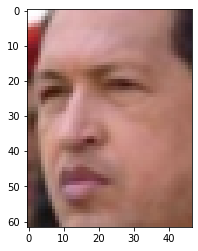

In [6]:
newface = lfw_people.data[0].reshape(62, 47, 3)/lfw_people.data.max()
print(newface.shape)
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(newface) 
plt.show()

In [7]:
print(len(lfw_people.target_names))
print(lfw_people.target_names)


7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [8]:
import numpy
print(len(lfw_people.target))
print(lfw_people.target)

1288
[5 6 3 ... 5 3 5]


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_faces = scaler.fit_transform(lfw_people.data)
y_faces = lfw_people.target

import math
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_faces, y_faces, test_size=0.25)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(966, 8742) (966,) (322, 8742) (322,)


In [16]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from sklearn.decomposition import PCA
from time import time
n_components = 150

print("Extracting the top %d eigenfaces from %d faces", 
      (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

# introspect the images arrays to find the shapes
print("lfw_people.image shape", lfw_people.images.shape)
print("pca.components_.shape", pca.components_.shape)

n_samples, h, w, c = lfw_people.images.shape
eigenfaces = pca.components_.reshape((n_components, h, w, c))
print("eigenfaces.shape ", eigenfaces.shape)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape:", X_train_pca.shape)
print("X_train_pca.shape:", X_test_pca.shape)
print("done in %0.3fs" % (time() - t0))

Extracting the top %d eigenfaces from %d faces (150, 966)
done in 0.360s
lfw_people.image shape (1288, 62, 47, 3)
pca.components_.shape (150, 8742)
eigenfaces.shape  (150, 62, 47, 3)
Projecting the input data on the eigenfaces orthonormal basis
X_train_pca.shape: (966, 150)
X_train_pca.shape: (322, 150)
done in 0.062s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

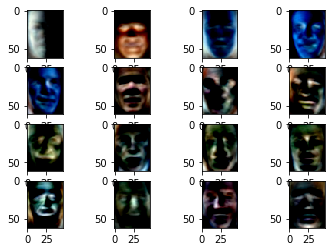

In [11]:
#Eigen Faces
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1, 17):
    plt.subplot(4,4, i)
    plt.imshow(eigenfaces[i]/ eigenfaces[i].max())
plt.show()

In [12]:
from sklearn import neighbors, linear_model
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial', verbose=2)
print('LogisticRegression score: %f'
      % logistic.fit(X_train_pca, y_train).score(X_test_pca, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression score: 0.863354


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [13]:
# Train a SVM classification model
from time import time
print("Fitting the classifier to the training set")
t0 = time()

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

from sklearn.svm import SVC
#clf = SVC(C= 1e3, gamma = 0.0001, verbose=True, kernel='rbf')
#clf = SVC(C= 100000, gamma = 0.0005, verbose=True, kernel='rbf')
#clf = SVC(C= 1000, gamma = 0.0001, verbose=True, kernel='rbf', tol=0.001)
#clf = SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
#  max_iter=-1, probability=False, random_state=None, shrinking=True,
#  tol=0.001, verbose=False)
#clf = SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
#  max_iter=-1, probability=False, random_state=None, shrinking=True,
#  tol=0.001, verbose=False)
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(), param_grid)
clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

Fitting the classifier to the training set


C:\Users\sales2\Anaconda3\envs\Plain\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


done in 14.636s


In [14]:
t0 = time()
print("done in %0.3fs" % (time() - t0), clf.score(X_test_pca, y_test))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

done in 0.000s 0.8571428571428571
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))
n_classes = len(lfw_people.target_names)
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.50      0.58        18
     Colin Powell       0.87      0.84      0.86        57
  Donald Rumsfeld       0.76      0.79      0.77        28
    George W Bush       0.92      0.92      0.92       142
Gerhard Schroeder       0.89      0.80      0.84        30
      Hugo Chavez       0.65      0.88      0.75        17
       Tony Blair       0.84      0.90      0.87        30

         accuracy                           0.86       322
        macro avg       0.80      0.80      0.80       322
     weighted avg       0.86      0.86      0.86       322

[[  9   2   3   2   0   1   1]
 [  2  48   0   4   0   2   1]
 [  0   2  22   3   0   1   0]
 [  1   2   2 131   1   3   2]
 [  1   0   1   3  24   1   0]
 [  0   0   0   0   1  15   1]
 [  0   1   1   0   1   0  27]]


In [36]:
help(pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Para